### First, we install and import the Gen3 Python SDK.

In [1]:
!pip install --force --upgrade gen3 --ignore-installed certifi

import gen3
from gen3.auth import Gen3Auth
from gen3.submission import Gen3Submission


  Using cached https://files.pythonhosted.org/packages/69/1b/b853c7a9d4f6a6d00749e94eb6f3a041e342a885b87340b79c1ef73e3a78/certifi-2019.6.16-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/60/247f23a7121ae632d62811ba7f273d0e58972d75e58a94d329d51550a47d/urllib3-1.25.3-py2.py3-none-any.whl


### Create instances of the SDK Classes
---
* First, we set the variable `api` to the URL of our Data Commons.
* Next, we set the `creds` variable to the location of the credentials.json downloaded from our user Profile page.
* Finally, we create two Gen3 SDK instances: 
    - `auth`, which handles our authentication.
    - `sub`, which interacts with the data query, export, and submission API endpoints.

In [2]:
api = 'https://nci-crdc-demo.datacommons.io'
creds = '/home/jovyan/pd/credentials.json'

auth = Gen3Auth(api, creds)
sub = Gen3Submission(api, auth)


### Use the Gen3 SDK to download the Drug Response Summary data
---
The SDK has a function called `export_node` that can be used to download all the structured data in a single node of a particular project.
Here we ask for the CCLE Drug Response Summary data as tab-separated values, save it as a file, and read that file into Python as a Pandas DataFrame.

In [3]:
program = 'DCF'
project = 'CCLE'
node_type = 'summary_drug_response'
fileformat = 'tsv'
filename = 'summary_drug_response.tsv'
data = sub.export_node(program, project, node_type, fileformat, filename)



Output written to file: summary_drug_response.tsv


### Now that the data is downloaded, we can read it in as a Pandas DataFrame

In [4]:
import pandas as pd

df = pd.read_csv(filename, sep='\t', header=0)
df.head()

,type,id,project_id,submitter_id,EC50,IC50,actarea,compound,fit_type,maximum_activity,samples.id,samples.submitter_id
0,summary_drug_response,df24950a-2a79-43ec-9daf-9aac8eb5a91f,DCF-CCLE,SU8686_PANCREAS_Sorafenib_sumdrug,NaN,8.000000,0.2178,Sorafenib,Constant,-3.182806,91d9cfdb-1766-456b-a8bd-3d8280f2fe03,SU8686_PANCREAS
1,summary_drug_response,f60c5f23-445f-448c-a28e-633f7b429e78,DCF-CCLE,OC316_OVARY_PLX4720_sumdrug,NaN,8.000000,0.1927,PLX4720,Constant,-4.456922,1eca246f-71ec-4e63-aefb-579d87e4e3cc,OC316_OVARY
2,summary_drug_response,d66b3388-206c-4172-bd09-b5a535b9fd17,DCF-CCLE,PC3_PROSTATE_AZD6244_sumdrug,NaN,8.000000,0.2844,AZD6244,Constant,-3.256629,96fb4375-1335-431a-85b3-e1d2c851c1d6,PC3_PROSTATE
3,summary_drug_response,30c17487-8223-4b41-b054-5063d0036c27,DCF-CCLE,UACC257_SKIN_AZD6244_sumdrug,0.146748,0.234048,2.9813,AZD6244,Sigmoid,-75.317490,597482db-0aae-42ea-9e80-8385e649f426,UACC257_SKIN
4,summary_drug_response,146b9ddf-53ea-491d-be49-457d0b7aa2cb,DCF-CCLE,1321N1_CENTRAL_NERVOUS_SYSTEM_Sorafenib_sumdrug,NaN,8.000000,0.2672,Sorafenib,Constant,2.363129,38fa7220-78f4-43f4-a46b-698b2c7d86b9,1321N1_CENTRAL_NERVOUS_SYSTEM


### Next, we add the tissue type and cell line name by extracting it from the sample IDs.


In [5]:
df['tissue'] = df['samples.submitter_id'].str.split('_', 1).str.get(1)
df['cell_line'] = df['samples.submitter_id'].str.split('_', 1).str.get(0)


### Now, I will download a class of Python functions from my public GitHub repository and load them into JupyterHub.
---
* First, I download a file that includes some plotting functions that I wrote for this demonstration using `wget`.
* Then, I run the file to read the class of functions into my Python environment.
* Finally, I create an instance of this Gen3Expansion class: `exp`

In [6]:
!rm expansion.py
!wget https://raw.githubusercontent.com/cgmeyer/gen3sdk-python/master/expansion/expansion.py
%run ./expansion.py
exp = Gen3Expansion(api, auth)


--2019-08-08 18:13:02--  https://raw.githubusercontent.com/cgmeyer/gen3sdk-python/master/expansion/expansion.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60971 (60K) [text/plain]
Saving to: ‘expansion.py’

expansion.py        100%[===================>]  59.54K  --.-KB/s    in 0.002s  

2019-08-08 18:13:02 (34.0 MB/s) - ‘expansion.py’ saved [60971/60971]



### Now that my plotting functions are ready to use, I define the properties from the data model that I'd like to plot.
---
* Here we'll plot the distribution of EC50 data for each tissue type using the `seaborn` and `matplotlib` packages.
* The custom function `plot_numeric_by_category` plots the distribution of a numerical property by each category of a categorical property.

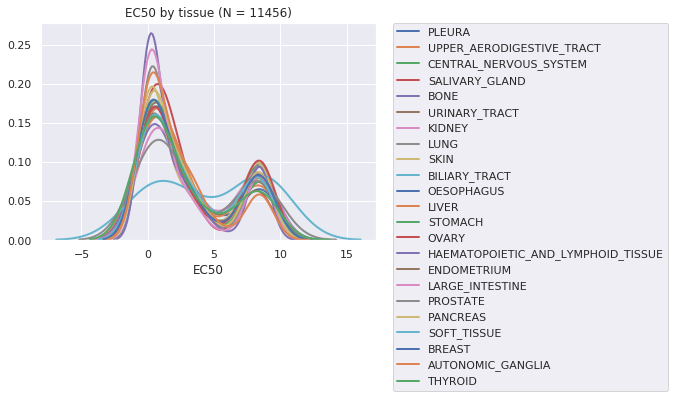

In [7]:
numeric_property = 'EC50'
category_property = 'tissue'
exp.plot_numeric_by_category(numeric_property,category_property,df)

* Here we can see that the legend has repeating colors, so the next function will plot only the 10 categories with the highest mean numeric values.
* This indicates which tissue type is on average the most sensitive to each drug tested.

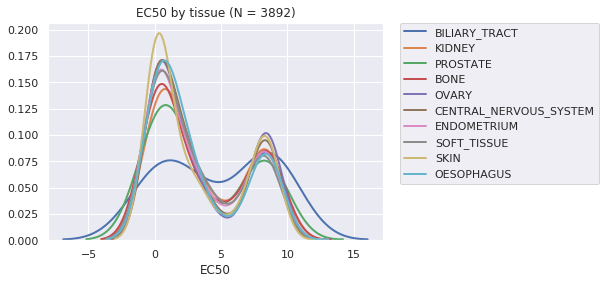

In [8]:
exp.plot_top10_numeric_by_category(numeric_property,category_property,df)

### Next, we plot the area under the activity curve for each compound in each tissue type in separate plots.
---
* First, we define the properties to plot as we did before.
* Then, we run the function `plot_top10_numeric_property_by_category`, which plots only the 10 category_2 values (compounds in this case) with the highest mean numeric property value (area under the activity curve, _actarea_ in this case).

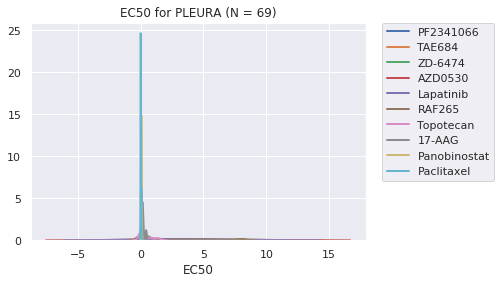

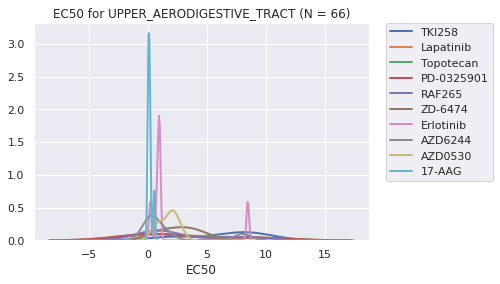

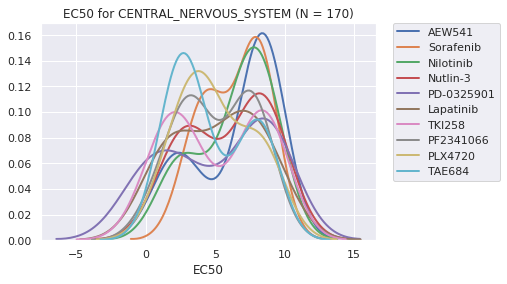

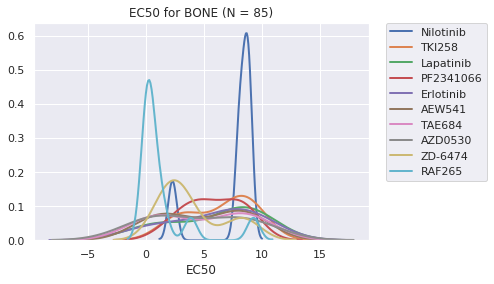

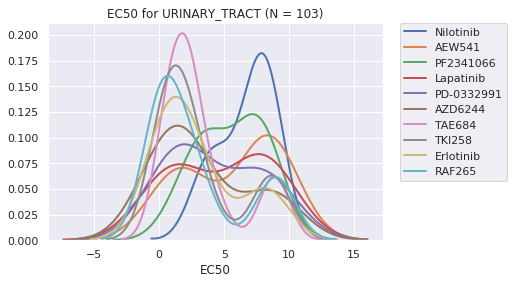

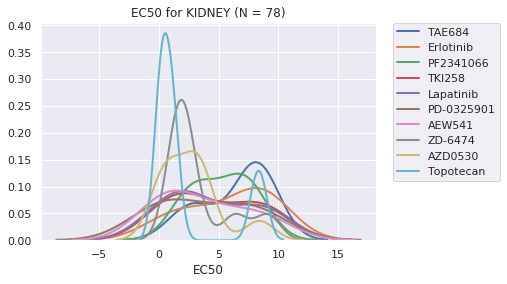

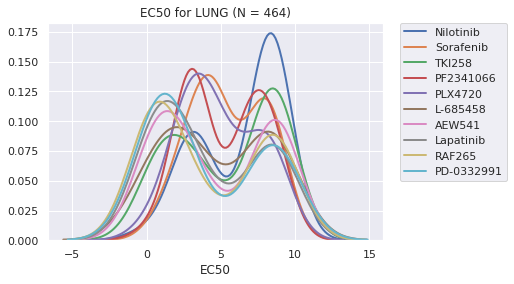

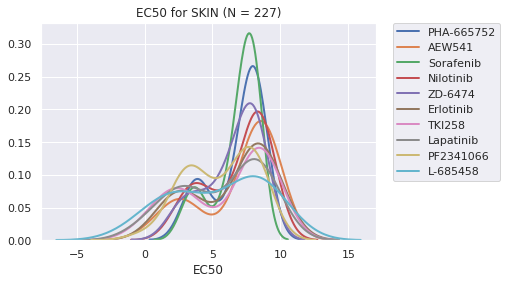

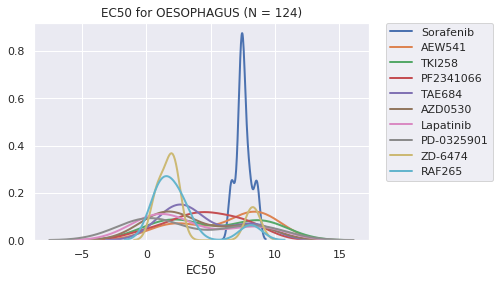

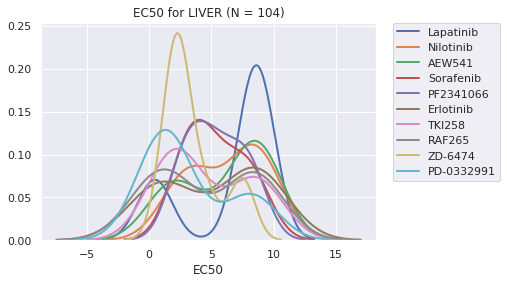

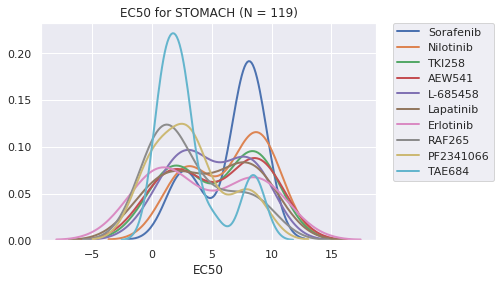

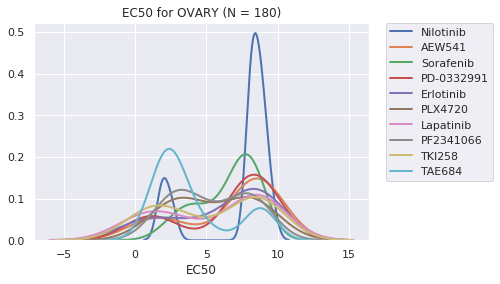

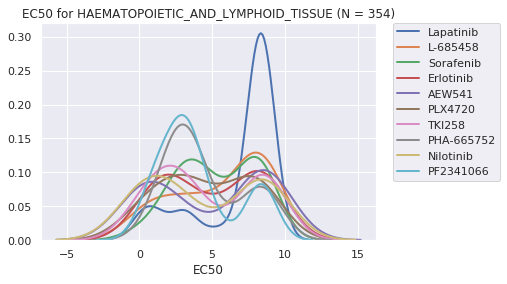

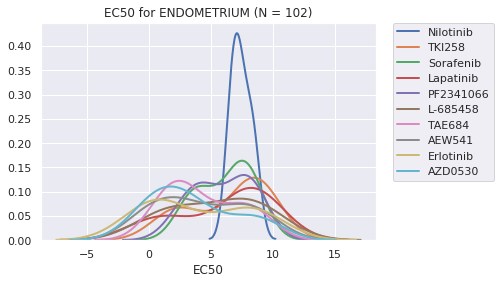

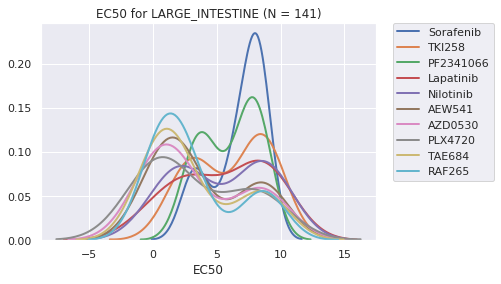

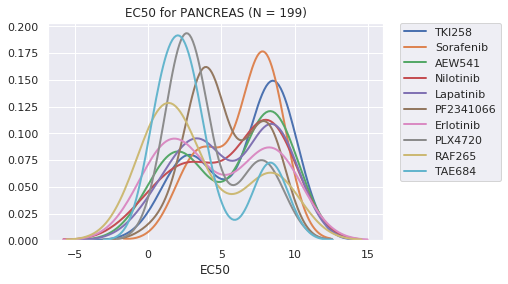

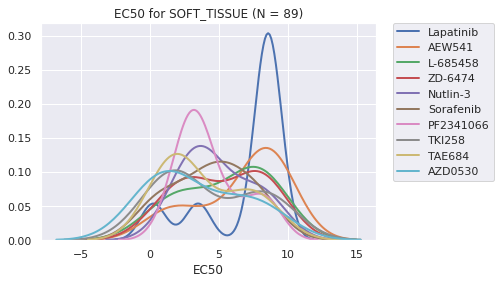

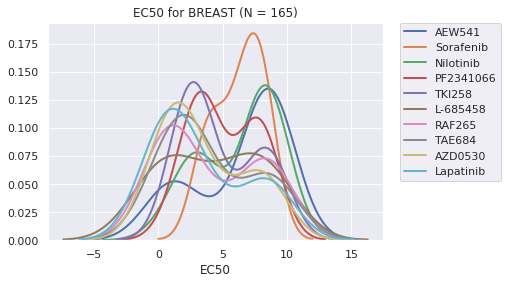

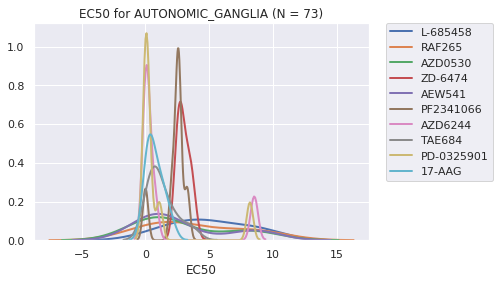

In [10]:
numeric_property = 'EC50'
category_property = 'tissue'
category_property_2 = 'compound'
exp.plot_top10_numeric_property_by_2_categories(numeric_property, category_property, category_property_2, df)

* These plots reveal that the drugs Paclitaxel and Panobinostat are on average the most active of all the drugs tested regardless of tissue type.

## Now, we will create and save summary tables of the data for use in the following *_R_* notebook demonstration.
---
* First, we calculate the number of tissue types and cell lines tested for each compound.
* Then, we calculate the number of cell lines of each tissue type.
* Finally, the data tables are saved to csv files to read into R.

In [11]:
df_1 = df.drop(columns=['type', 'id','project_id','samples.id','samples.submitter_id','submitter_id'])

df_t = df_1.groupby('tissue').nunique().sort_values(by=['cell_line'],ascending=False)
df_c = df_1.groupby('compound').nunique().sort_values(by=['cell_line'],ascending=False)

df_t.to_csv('ccle_tissue.csv')
df_c.to_csv('ccle_compound.csv')

tissue = pd.read_csv('ccle_tissue.csv').drop(columns=['tissue.1'])
compound = pd.read_csv('ccle_compound.csv').drop(columns=['compound.1'])
               

In [12]:
tissue_data = pd.DataFrame(
    {'Tissue': tissue.tissue.values.tolist()*2,
     'type': ['Compound count']*23 + ['Cell line count']*23,
     'Count': tissue.iloc[:,4].values.tolist() + tissue.iloc[:,7].values.tolist()
    })
tissue_data.to_csv('tissue_for_plot.csv')

In [13]:
compound_data = pd.DataFrame(
    {'Compound': compound['compound'].values.tolist()*2,
     'type': ['Cell line count']*24 +['Tissue type count']*24,
     'Count': compound.iloc[:,7].values.tolist() +compound.iloc[:,6].values.tolist()
    })
compound_data.to_csv('compound_for_plot.csv')

In [14]:
df_1.groupby('compound').mean().sort_values(by=['actarea'],ascending=False).to_csv('compound_order.csv')
df_1.groupby('tissue').mean().sort_values(by=['actarea'],ascending=False).to_csv('tissue_order.csv')
df_1.groupby(['compound','tissue']).median().to_csv('multiple_curve_2.csv')

### The first summary table is the averaged drug response data by compound.

In [15]:
df_1.groupby('compound').mean().sort_values(by=['actarea'],ascending=False)

,EC50,IC50,actarea,maximum_activity
compound,,,,
Paclitaxel,0.055224,0.582156,5.202265,-79.744354
Panobinostat,0.070773,0.080051,4.387768,-96.590084
17-AAG,0.303645,0.738078,3.400540,-77.827699
Irinotecan,0.799942,0.697344,3.088336,-88.904734
Topotecan,1.501529,1.438628,2.947774,-82.396292
PD-0325901,2.130950,4.955541,1.896262,-44.566337
RAF265,3.101900,3.922427,1.554152,-60.377964
AZD6244,1.728475,6.217981,1.336545,-31.101412
TAE684,3.652550,4.396572,1.318727,-61.413843


### The second summary table is the averaged drug response data by tissue type.

In [16]:
df_1.groupby('tissue').mean().sort_values(by=['actarea'],ascending=False)

,EC50,IC50,actarea,maximum_activity
tissue,,,,
HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,2.602647,4.693872,1.924827,-50.397306
THYROID,2.879477,4.989380,1.746522,-48.768784
AUTONOMIC_GANGLIA,2.421893,4.990083,1.724049,-46.207137
SOFT_TISSUE,3.194040,4.926745,1.669285,-49.993035
LARGE_INTESTINE,2.561076,5.111882,1.615136,-45.156063
STOMACH,2.953246,5.117745,1.580237,-44.685201
BONE,3.452306,5.540112,1.545952,-43.030236
SKIN,3.170728,5.164544,1.530032,-45.553102
OESOPHAGUS,3.157617,4.986812,1.519380,-48.055705


### The final summary table is the averaged drug response data by compound for each tissue.


In [17]:
df_1.groupby(['compound','tissue']).median()

EC50      IC50  actarea  \
compound  tissue                                                            
17-AAG    AUTONOMIC_GANGLIA                   0.536194  0.815221  2.57815   
          BILIARY_TRACT                       0.079781  0.091983  3.60460   
          BONE                                0.164396  0.198153  3.20330   
          BREAST                              0.059545  0.113744  3.25335   
          CENTRAL_NERVOUS_SYSTEM              0.153228  0.214575  3.13440   
          ENDOMETRIUM                         0.141005  0.194943  3.13790   
          HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.242188  0.284390  3.49970   
          KIDNEY                              0.230306  0.420389  2.30240   
          LARGE_INTESTINE                     0.076769  0.079111  4.15960   
          LIVER                               0.235731  0.230151  2.70210   
          LUNG                                0.096476  0.123309  3.24580   
          OESOPHAGUS                          0.084955  0.107681  3.80275   
          OVARY                               0.180797  0.267247  2.75005   
          PANCREAS                            0.098088  0.135158  3.45000   
          PLEURA                              0.165938  0.190374  3.09590   
          PROSTATE                            0.224230  0.329702  3.06220   
          SALIVARY_GLAND                      0.343221  0.339545  3.70770   
          SKIN                                0.067191  0.090017  3.54990   
          SOFT_TISSUE                         0.081286  0.086987  4.10965   
          STOMACH                             0.075761  0.094070  3.89905   
          THYROID                             0.184246  0.210629  3.67590   
          UPPER_AERODIGESTIVE_TRACT           0.115103  0.091869  4.46000   
          URINARY_TRACT                       0.062411  0.074362  3.61580   
AEW541    AUTONOMIC_GANGLIA                   1.248969  1.430018  1.98895   
          BILIARY_TRACT                       8.685517  8.000000  0.36280   
          BONE                                5.658935  3.710703  1.51480   
          BREAST                              8.431912  8.000000  0.78115   
          CENTRAL_NERVOUS_SYSTEM              8.196211  8.000000  0.71170   
          ENDOMETRIUM                         3.503829  8.000000  0.67085   
          HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  6.096010  5.570897  1.09930   
...                                                ...       ...      ...   
Topotecan SALIVARY_GLAND                      0.090558  0.083753  4.60560   
          SKIN                                0.573215  0.637036  2.60510   
          SOFT_TISSUE                         0.138829  0.177290  3.65305   
          STOMACH                             0.291266  0.358377  3.26985   
          THYROID                             0.159106  0.187748  3.65870   
          UPPER_AERODIGESTIVE_TRACT           0.449565  0.368205  3.25420   
          URINARY_TRACT                       0.632355  0.711350  2.63345   
ZD-6474   AUTONOMIC_GANGLIA                   2.843219  8.000000  1.12220   
          BILIARY_TRACT                       3.071936  8.000000  1.21560   
          BONE                                2.587259  8.000000  0.98400   
          BREAST                              2.460749  8.000000  0.74455   
          CENTRAL_NERVOUS_SYSTEM              2.834900  8.000000  0.77630   
          ENDOMETRIUM                         2.164594  4.704781  1.53630   
          HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  2.313053  8.000000  1.30150   
          KIDNEY                              1.956734  2.985716  1.46875   
          LARGE_INTESTINE                     1.485983  8.000000  1.29040   
          LIVER                               2.420187  8.000000  0.99080   
          LUNG                                2.339271  8.000000  0.91350   
          OESOPHAGUS                          1.963456  6.043905  1.28400   
          OVARY                               

### Now that the data has been exported and massaged into a format for easy plotting, an R notebook can be created to use the `ggplot2` library for making some interesting plots.

#### This notebook was created by Fang Wang (CTDS Senior Bioinformatician) and Chris Meyer (CTDS Scientific Support Analyst) for the "Gen3 Data Exportation" webinar on August 8, 2019.